In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import time
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFECV
import os
#os.environ['PROJ_LIB'] = '/Users/tsyo/anaconda/share/proj/'
os.environ['PROJ_LIB'] = 'D:\\program\\anaconda3\\Library\\share\\'
from mpl_toolkits.basemap import Basemap
# For Chinese font
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="NotoSansCJKtc-Regular.otf", size=10)



[ 773 1256 1613]


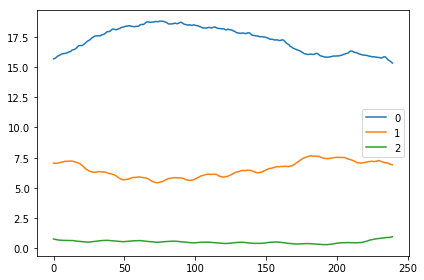

In [2]:

from sklearn.cluster import AgglomerativeClustering
from sklearn import linear_model
ncluster = 3
data11 = pd.read_csv('apts_68station.csv')
hc = AgglomerativeClustering(n_clusters=ncluster, affinity='euclidean', linkage='ward')  
hc.fit_predict(data11.T) 

print(np.bincount(hc.labels_))
#print(hc.labels_)

for i in range(ncluster):
    plt.plot(data11.iloc[:,hc.labels_==i].mean(axis=1),label=i)
plt.legend()
plt.tight_layout()
plt.show()



In [3]:

YY = (hc.labels_==0)*1
YY = np.array(YY).flatten()
print(YY.shape)



(3642,)


In [4]:
allrh700 = pd.read_csv('lts_local.csv')
print(allrh700.shape)
allrh700.head()
from sklearn.decomposition import PCA
forpca= allrh700.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
proj = pca.transform(forpca)

(3651, 673)
(3651, 672)


In [5]:
allrh700 = pd.read_csv('pv_local.csv')
print(allrh700.shape)
allrh700.head()
from sklearn.decomposition import PCA
forpca= allrh700.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projpv = pca.transform(forpca)

(3651, 673)
(3651, 672)


In [6]:
allrh850 = pd.read_csv('tw_h500.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projh500 = pca.transform(forpca)

(3642, 6720)


In [49]:
allrh850 = pd.read_csv('th925_local.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projth925 = pca.transform(forpca)

(3651, 672)


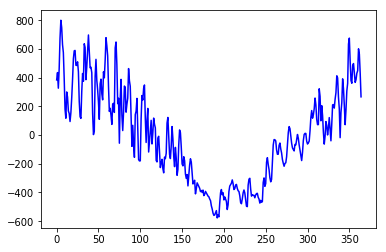

In [38]:
plt.plot(projth925[:365,0],'b-')

In [39]:
allrh850 = pd.read_csv('the925_local_mri.csv')

mri= allrh850.iloc[:,1:]
print(mri.shape)
mri_pca = pca.transform(mri)
print(mri_pca.shape)

(3651, 672)
(3651, 200)


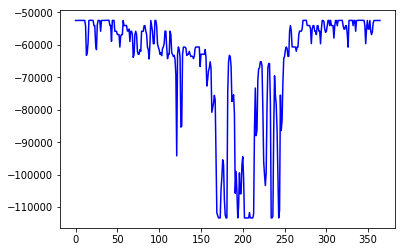

In [40]:
plt.plot(mri_pca[:365,0], 'b-')

In [11]:
def show_cfsr_array(data, title=None):
    # Read data
    tmp = data
    # Create Basemap for CFSR
    lons = np.linspace(114.5, 128., num=tmp.shape[1])
    lats = np.linspace(18., 29.5, num=tmp.shape[0])
    x, y = np.meshgrid(lons,lats)
    m = Basemap(llcrnrlon=114.5, urcrnrlon=128., llcrnrlat=18., urcrnrlat=29.5)
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.contourf(x, y, tmp, 30, cmap=plt.cm.jet)
    m.colorbar()
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    plt.show()
    return(0)

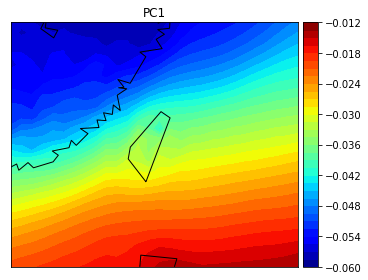

0

In [41]:
show_cfsr_array(pca.components_[0].reshape(24,28), 'PC1')

In [13]:
allrh850 = pd.read_csv('div925_local.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projdiv925 = pca.transform(forpca)

(3651, 672)


In [14]:
allrh850 = pd.read_csv('div700_local.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projdiv700 = pca.transform(forpca)

(3651, 672)


In [15]:
allrh850 = pd.read_csv('th700_local.csv')
from sklearn.decomposition import PCA
forpca= allrh850.iloc[:,1:]
print(forpca.shape)
pca = PCA(n_components=200)                                  # Initialize a PCA with 10 PCs
pca.fit(forpca)                                               # Calculate PCA
projth700 = pca.transform(forpca)

(3651, 672)


In [16]:
nor_lts = preprocessing.scale(proj,axis=0)
nor_pv = preprocessing.scale(projpv,axis=0)
nor_h500 = preprocessing.scale(projh500,axis=0)
nor_th925 = preprocessing.scale(projth925,axis=0)
nor_div925 = preprocessing.scale(projdiv925,axis=0)
nor_th700 = preprocessing.scale(projth700,axis=0)
nor_div700 = preprocessing.scale(projdiv700,axis=0)

nor_mri = preprocessing.scale(mri_pca,axis=0)

In [17]:
akk=np.empty((3642,210))

akk[:,0:30] = nor_lts[0:3642,0:30]
akk[:,30:60] = nor_pv[0:3642,0:30]
akk[:,60:90] = nor_th925[0:3642,0:30]
akk[:,90:120] = nor_div925[0:3642,0:30]
akk[:,120:150] = nor_h500[0:3642,0:30]
akk[:,150:180] = nor_th700[0:3642,0:30]
akk[:,180:210] = nor_div700[0:3642,0:30]
akk_mri=np.empty((3642,1))
akk_mri[:,0] = nor_mri[0:3642,0]

In [23]:
# Split data into training and testing: 2005~2013 for training, and 2014 for testing
x_test = np.array(akk[2912:,:])
y_test = np.array(YY[2912:,])
X = np.array(akk[:2912,:])
Y = np.array(YY[:2912,])

#
print('Data dimension: ')
print('    Training set: ')
print(X.shape)
print(Y.shape)
print('    Test set: ')
print(x_test.shape)
print(y_test.shape)
print()


# Metrics function for reuse
def evaluate_model(y_true, y_pred):
    # Create confusion matrix
    cfm = pd.crosstab(y_true, y_pred, rownames=['Truth'], colnames=['Prediction'])
    # Create report
    from sklearn.metrics import accuracy_score, classification_report
    cr = classification_report(y_true, y_pred)
    return({'matrix':cfm, 'report':cr})

Data dimension: 
    Training set: 
(2912, 210)
(2912,)
    Test set: 
(730, 210)
(730,)



In [19]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

sp = SelectPercentile(mutual_info_classif, percentile=60)
sp.fit(X, Y)
newx = sp.transform(X)
print(newx.shape)

# Fit the classifier
glm = LogisticRegression(C=1e5, solver='lbfgs', max_iter=500)
glm.fit(newx, Y)
yhat = glm.predict(newx)

# Show results on training data
cfm = evaluate_model(Y, yhat)
print(cfm['matrix'])
print()
print(cfm['report'])

# Show results on test data
newx_test = sp.transform(x_test)
yhat = glm.predict(newx_test)
cfm = evaluate_model(y_test, yhat)
print(cfm['matrix'])
print()
print(cfm['report'])

(2912, 126)
Prediction     0    1
Truth                
0           2022  163
1            288  439

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2185
           1       0.73      0.60      0.66       727

   micro avg       0.85      0.85      0.85      2912
   macro avg       0.80      0.76      0.78      2912
weighted avg       0.84      0.85      0.84      2912

Prediction    0   1
Truth              
0           607  77
1            20  26

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       684
           1       0.25      0.57      0.35        46

   micro avg       0.87      0.87      0.87       730
   macro avg       0.61      0.73      0.64       730
weighted avg       0.92      0.87      0.89       730



In [80]:
y_test = np.array(YY[:,])

X = np.array(akk[:,:])
Y = np.array(YY[:,])

Optimal number of features : 1


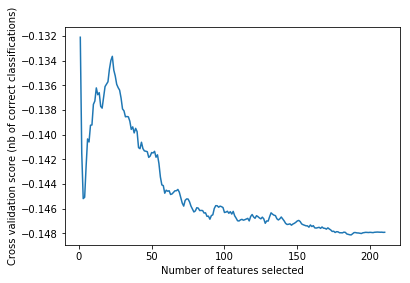

In [21]:
# Reference: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
glm = LogisticRegression(C=1e5, solver='lbfgs', max_iter=500)
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=glm, step=1, cv=StratifiedKFold(5), scoring='brier_score_loss')
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [72]:
x_test = np.array(akk[2912:,:])
y_test = np.array(YY[2912:,])
X = np.array(akk[:2912,:])
Y = np.array(YY[:2912,])

In [73]:
x_rfe = akk[:2912,60].reshape(-1, 1)
x_test_rfe = akk[2912:,60].reshape(-1, 1)
print(x_rfe.shape)
print(x_test_rfe.shape)
# Fit the classifier
glm = LogisticRegression(C=1e5, solver='lbfgs', max_iter=500)
glm.fit(x_rfe, Y)
yhat = glm.predict(x_rfe)

# Show results on training set
cfm = evaluate_model(Y, yhat)
print(cfm['matrix'])
print()
print(cfm['report'])

# Show results on test set
yhat = glm.predict(x_test_rfe)
cfm = evaluate_model(y_test, yhat)
print(cfm['matrix'])
print()
print(cfm['report'])

(2912, 1)
(730, 1)
Prediction     0    1
Truth                
0           1990  195
1            459  268

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2185
           1       0.58      0.37      0.45       727

   micro avg       0.78      0.78      0.78      2912
   macro avg       0.70      0.64      0.65      2912
weighted avg       0.75      0.78      0.76      2912

Prediction    0   1
Truth              
0           636  48
1            21  25

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       684
           1       0.34      0.54      0.42        46

   micro avg       0.91      0.91      0.91       730
   macro avg       0.66      0.74      0.68       730
weighted avg       0.93      0.91      0.92       730



In [35]:
x_rfe = akk[:,60].reshape(-1, 1)
x_test_rfe = akk_mri[:,0].reshape(-1, 1)
print(x_rfe.shape)
print(x_test_rfe.shape)
# Fit the classifier
glm = LogisticRegression(C=1e5, solver='lbfgs', max_iter=500)
glm.fit(x_rfe, Y)
yhat = glm.predict(x_rfe)
ori=yhat
# Show results on training set
cfm = evaluate_model(Y, yhat)
print(cfm['matrix'])
print()
print(cfm['report'])

# Show results on test set
yhat = glm.predict(x_test_rfe)
cfm = evaluate_model(y_test, yhat)
print(cfm['matrix'])
print()
print(cfm['report'])

(3642, 1)
(3642, 1)
Prediction     0    1
Truth                
0           2706  163
1            537  236

              precision    recall  f1-score   support

           0       0.83      0.94      0.89      2869
           1       0.59      0.31      0.40       773

   micro avg       0.81      0.81      0.81      3642
   macro avg       0.71      0.62      0.64      3642
weighted avg       0.78      0.81      0.78      3642

Prediction     0  1
Truth              
0           2866  3
1            765  8

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2869
           1       0.73      0.01      0.02       773

   micro avg       0.79      0.79      0.79      3642
   macro avg       0.76      0.50      0.45      3642
weighted avg       0.78      0.79      0.70      3642



In [36]:
print(sum(ori))
print(sum(Y))

399
773


(3651, 672)
(3651, 672)


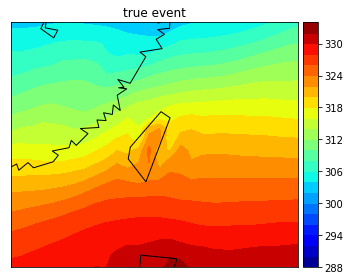

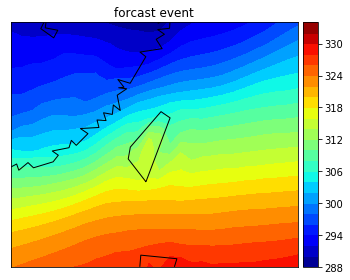

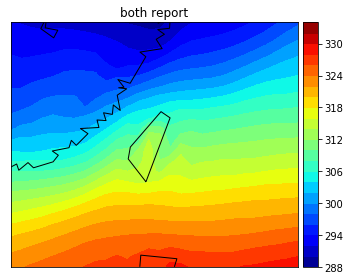

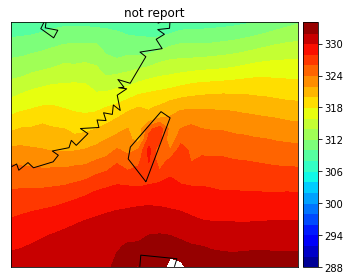

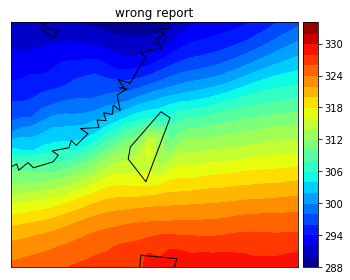

0

In [95]:
print(mri.shape)
mrinp= np.array(mri)
mrire=mrinp.reshape(3651,24,28)
print(forpca.shape)

def show_cfsr_array(data, title=None):
    # Read data
    tmp = data
    # Create Basemap for CFSR
    lons = np.linspace(114.5, 128., num=tmp.shape[1])
    lats = np.linspace(18., 29.5, num=tmp.shape[0])
    x, y = np.meshgrid(lons,lats)
    m = Basemap(llcrnrlon=114.5, urcrnrlon=128., llcrnrlat=18., urcrnrlat=29.5)
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.contourf(x, y, tmp, levels=np.linspace(288,334,24), cmap=plt.cm.jet)
    m.colorbar()
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    plt.show()
    return(0)

th925np= np.array(forpca)
th925aaa= th925np[0:3642,:]
show_cfsr_array(th925aaa[Y==1,:].mean(axis=0).reshape(24,28), 'true event')
show_cfsr_array(th925aaa[ori==1,:].mean(axis=0).reshape(24,28), 'forcast event')
show_cfsr_array(th925aaa[((Y==1) & (ori==1)),:].mean(axis=0).reshape(24,28), 'both report')
show_cfsr_array(th925aaa[((Y==1) & (ori==0)),:].mean(axis=0).reshape(24,28), 'not report')
show_cfsr_array(th925aaa[((Y==0) & (ori==1)),:].mean(axis=0).reshape(24,28), 'wrong report')

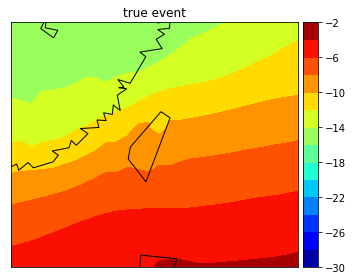

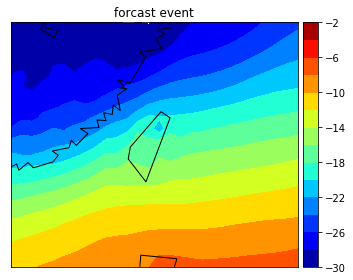

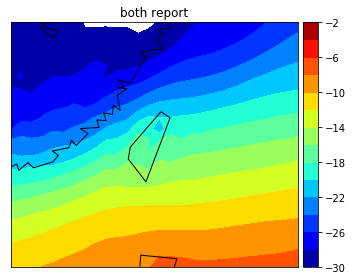

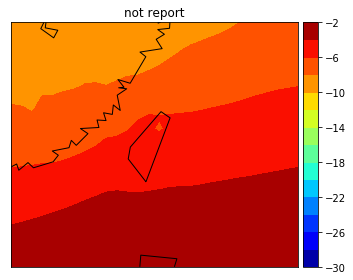

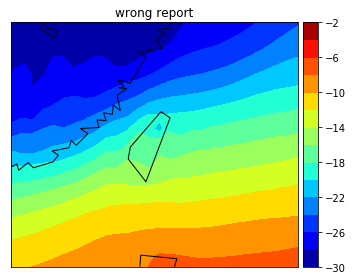

0

In [99]:
vector=projth925[0:3642,0]
pc1map=np.empty((3642,672))
for i in range(0,3642):
 pc1map[i,:]=vector[i,]*pca.components_[0]
th925np= np.array(forpca)

def show_cfsr_array(data, title=None):
    # Read data
    tmp = data
    # Create Basemap for CFSR
    lons = np.linspace(114.5, 128., num=tmp.shape[1])
    lats = np.linspace(18., 29.5, num=tmp.shape[0])
    x, y = np.meshgrid(lons,lats)
    m = Basemap(llcrnrlon=114.5, urcrnrlon=128., llcrnrlat=18., urcrnrlat=29.5)
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.contourf(x, y, tmp, 30, levels=np.linspace(-30,-2,15),cmap=plt.cm.jet)
    m.colorbar()
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    plt.show()
    return(0)


th925aaa= th925np[0:3642,:]
show_cfsr_array(pc1map[Y==1,:].mean(axis=0).reshape(24,28), 'true event')
show_cfsr_array(pc1map[ori==1,:].mean(axis=0).reshape(24,28), 'forcast event')
show_cfsr_array(pc1map[((Y==1) & (ori==1)),:].mean(axis=0).reshape(24,28), 'both report')
show_cfsr_array(pc1map[((Y==1) & (ori==0)),:].mean(axis=0).reshape(24,28), 'not report')
show_cfsr_array(pc1map[((Y==0) & (ori==1)),:].mean(axis=0).reshape(24,28), 'wrong report')